In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np

In [2]:
iris_data = load_iris()

In [3]:
X = pd.DataFrame(iris_data.data, columns=iris_data.feature_names)
y = pd.DataFrame(iris_data.target, columns=['class'])

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)
y_train = y_train.values.ravel() # 결과시 경고메시지 안나오게

In [5]:
model = RandomForestClassifier(n_estimators=100, max_depth=4)
#n_estimators : 결정트리를 몇개를 만들건지 결정(default: 10)
#max_depth : 결정트리 노드의 최대깊이

In [6]:
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=4)

In [7]:
model.predict(X_test)

array([1, 1, 2, 0, 2, 1, 0, 2, 0, 1, 1, 1, 2, 2, 0, 0, 2, 2, 0, 0, 1, 2,
       0, 1, 1, 2, 1, 1, 1, 2])

In [8]:
model.score(X_test, y_test)

0.9

In [9]:
importances = model.feature_importances_
#랜덤포레스트도 결정트리를 이용하기 때문에 속성중요도가 저장되어 있음

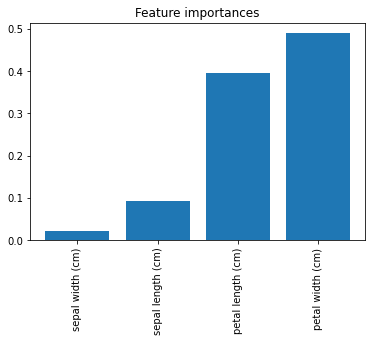

In [10]:
indices_sorted = np.argsort(importances)

plt.figure()
plt.title("Feature importances")
plt.bar(range(len(importances)), importances[indices_sorted])
plt.xticks(range(len(importances)), X.columns[indices_sorted], rotation=90)
plt.show()
# 각 속성들이 얼만큼 중요하게 적용되었는지 시각화